+--------------+----------------+-----------------+------+--------------------------+----------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance|Previous qualification|Nacionality|Mother's qualification|Father's qualification|

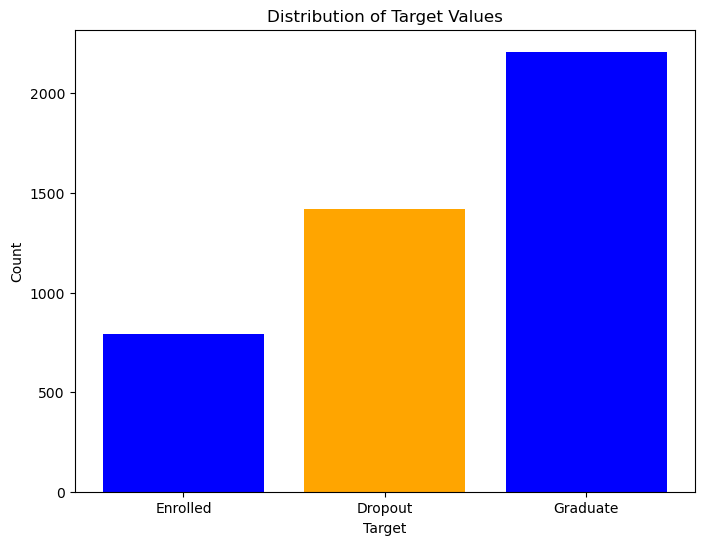

In [3]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("HadoopReadExample") \
    .config("spark.eventLog.enabled", "true") \
    .config("spark.eventLog.dir", "file:/home/jovyan/work/logs") \
    .getOrCreate()

# Hadoop namenode address

# hadoop_namenode_address = "172.18.0.6"
hadoop_namenode_address = "namenode.docker-hadoop-default"
csv_path = f"hdfs://{hadoop_namenode_address}:9000/user/root/student_data"
# HDFS path to your CSV file


# Read the CSV file into a PySpark DataFrame
df_from_hdfs = spark.read.csv(csv_path, header=True, inferSchema=True)

# Show the DataFrame
df_from_hdfs.show()

# Basic Analysis
# 1. Display summary statistics for numerical columns
numerical_summary = df_from_hdfs.describe().toPandas()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

# 2. Show the schema of the DataFrame
print("\nDataFrame Schema:")
df_from_hdfs.printSchema()

# 3. Display the first few rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
df_from_hdfs.show(5)

# 4. Count the number of rows in the DataFrame
print("\nNumber of Rows in DataFrame:", df_from_hdfs.count())

# 5. Count the number of missing values in each column
missing_values = {col: df_from_hdfs.filter(df_from_hdfs[col].isNull()).count() for col in df_from_hdfs.columns}
print("\nMissing Values in Each Column:")
for col, count in missing_values.items():
    print(f"{col}: {count}")

# 6. Perform other analyses as needed...
# Count the occurrences of each value in the "Target" column
target_counts = df_from_hdfs.groupBy("Target").count().toPandas()

# Plot a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(target_counts["Target"], target_counts["count"], color=['blue', 'orange'])
plt.title("Distribution of Target Values")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()
# Stop the Spark session
spark.stop()